In [2]:
df_train = pd.read_csv("C:/Users/FPTSHOP/OneDrive/Documents/SAV/data/RawData/mobileData/Train.csv", index_col= 0)

In [3]:
df_train.head()

,comment,n_star,date_time,label
index,,,,
0,Mới mua máy này Tại thegioididong thốt nốt cảm...,5,2 tuần trước,{CAMERA#Positive};{FEATURES#Positive};{BATTERY...
1,Pin kém còn lại miễn chê mua 8/3/2019 tình trạ...,5,14/09/2019,{BATTERY#Negative};{GENERAL#Positive};{OTHERS};
2,Sao lúc gọi điện thoại màn hình bị chấm nhỏ nh...,3,17/08/2020,{FEATURES#Negative};
3,"Mọi người cập nhật phần mềm lại , nó sẽ bớt tố...",3,29/02/2020,{FEATURES#Negative};{BATTERY#Neutral};{GENERAL...
4,"Mới mua Sài được 1 tháng thấy pin rất trâu, Sà...",5,4/6/2020,{BATTERY#Positive};{PERFORMANCE#Positive};{SER...


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7780 entries, 0 to 7785
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   comment    7780 non-null   object
 1   n_star     7780 non-null   int64 
 2   date_time  7780 non-null   object
 3   label      7780 non-null   object
dtypes: int64(1), object(3)
memory usage: 303.9+ KB


## **Train - Lables**

In [5]:
# Regular expression pattern to match aspect names and labels
pattern = r'{([^#]*)#([^}]*)'

# Initialize dictionary to store counts
aspect_label_counts = {}

# Extract aspect names and labels
for sentence in df_train.label:
    matches = re.findall(pattern, sentence)
    for aspect, label in matches:
        if aspect not in aspect_label_counts:
            aspect_label_counts[aspect] = {'Positive': 0, 'Negative': 0,'Neutral': 0}
        aspect_label_counts[aspect][label] += 1

# Convert to DataFrame
df_check_label_train = pd.DataFrame(aspect_label_counts).T.reset_index()
df_check_label_train.columns = ['Aspect', 'Positive', 'Negative','Neutral']

In [6]:
df_check_label_train

,Aspect,Positive,Negative,Neutral
0,CAMERA,1230,627,288
1,FEATURES,785,1658,197
2,BATTERY,2026,1225,349
3,PRICE,608,316,1136
4,GENERAL,3625,949,290
5,SER&ACC,1399,487,107
6,PERFORMANCE,2253,1495,390
7,SCREEN,513,379,55
8,DESIGN,998,302,77
9,STORAGE,59,21,11


In [7]:
totals_train = df_check_label_train[['Positive', 'Negative', 'Neutral']].sum()

totals_row = pd.DataFrame([['Total', *totals_train]], columns=df_check_label_train.columns)

df_check_label_train = pd.concat([df_check_label_train, totals_row], ignore_index=True)

print(df_check_label_train)

         Aspect  Positive  Negative  Neutral
0        CAMERA      1230       627      288
1      FEATURES       785      1658      197
2       BATTERY      2026      1225      349
3         PRICE       608       316     1136
4       GENERAL      3625       949      290
5       SER&ACC      1399       487      107
6   PERFORMANCE      2253      1495      390
7        SCREEN       513       379       55
8        DESIGN       998       302       77
9       STORAGE        59        21       11
10        Total     13496      7459     2900


In [8]:
df_check_label_train['Row_Total'] = df_check_label_train[['Positive', 'Negative', 'Neutral']].sum(axis=1)
df_check_label_train


,Aspect,Positive,Negative,Neutral,Row_Total
0,CAMERA,1230,627,288,2145
1,FEATURES,785,1658,197,2640
2,BATTERY,2026,1225,349,3600
3,PRICE,608,316,1136,2060
4,GENERAL,3625,949,290,4864
5,SER&ACC,1399,487,107,1993
6,PERFORMANCE,2253,1495,390,4138
7,SCREEN,513,379,55,947
8,DESIGN,998,302,77,1377
9,STORAGE,59,21,11,91


In [9]:
df_train_plot = df_check_label_train[:-1]
df_train_plot_sorted = df_train_plot.sort_values(by='Row_Total', ascending= False)
df_train_plot_sorted

,Aspect,Positive,Negative,Neutral,Row_Total
4,GENERAL,3625,949,290,4864
6,PERFORMANCE,2253,1495,390,4138
2,BATTERY,2026,1225,349,3600
1,FEATURES,785,1658,197,2640
0,CAMERA,1230,627,288,2145
3,PRICE,608,316,1136,2060
5,SER&ACC,1399,487,107,1993
8,DESIGN,998,302,77,1377
7,SCREEN,513,379,55,947
9,STORAGE,59,21,11,91


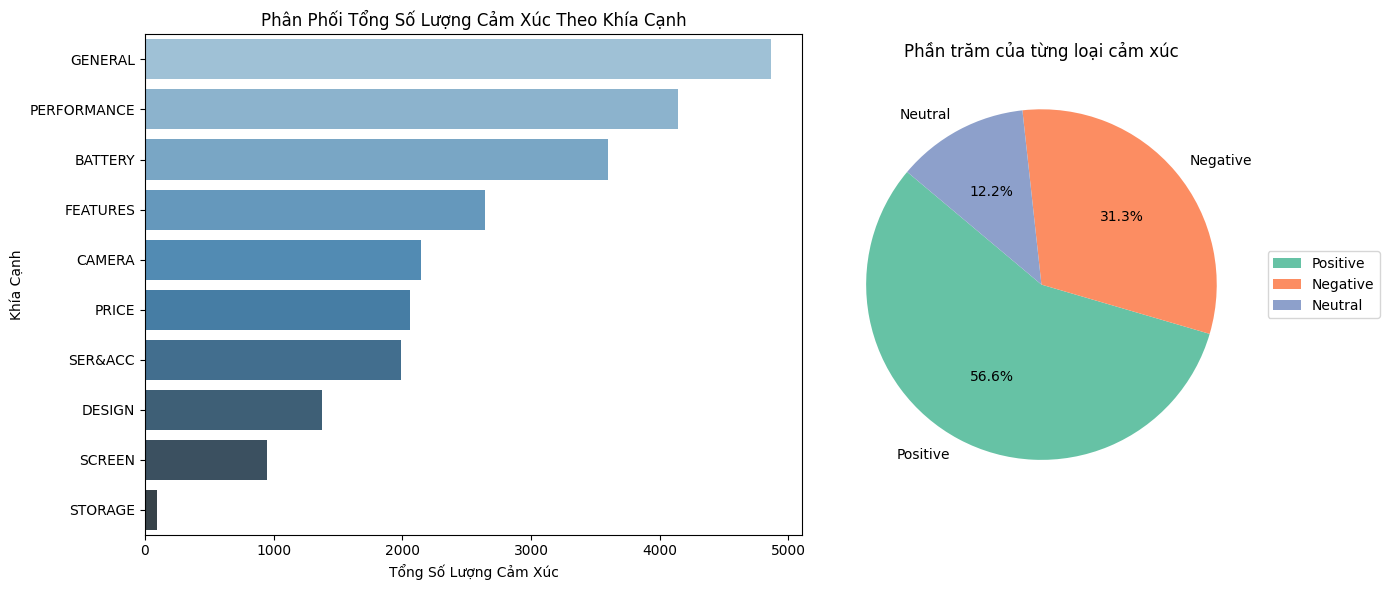

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo figure và axes cho subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [6, 4]})

# Biểu đồ cột
sns.barplot(x='Row_Total', y='Aspect', data=df_train_plot_sorted, palette='Blues_d', ax=axs[0])
axs[0].set_title('Phân Phối Tổng Số Lượng Cảm Xúc Theo Khía Cạnh')
axs[0].set_xlabel('Tổng Số Lượng Cảm Xúc')
axs[0].set_ylabel('Khía Cạnh')
sizes = [13496, 7459, 2900]

# Biểu đồ tròn
colors = sns.color_palette('Set2')
axs[1].pie(sizes, labels=['Positive','Negative','Neutral'], autopct='%1.1f%%', startangle=140, colors=colors)
axs[1].set_title('Phần trăm của từng loại cảm xúc')
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


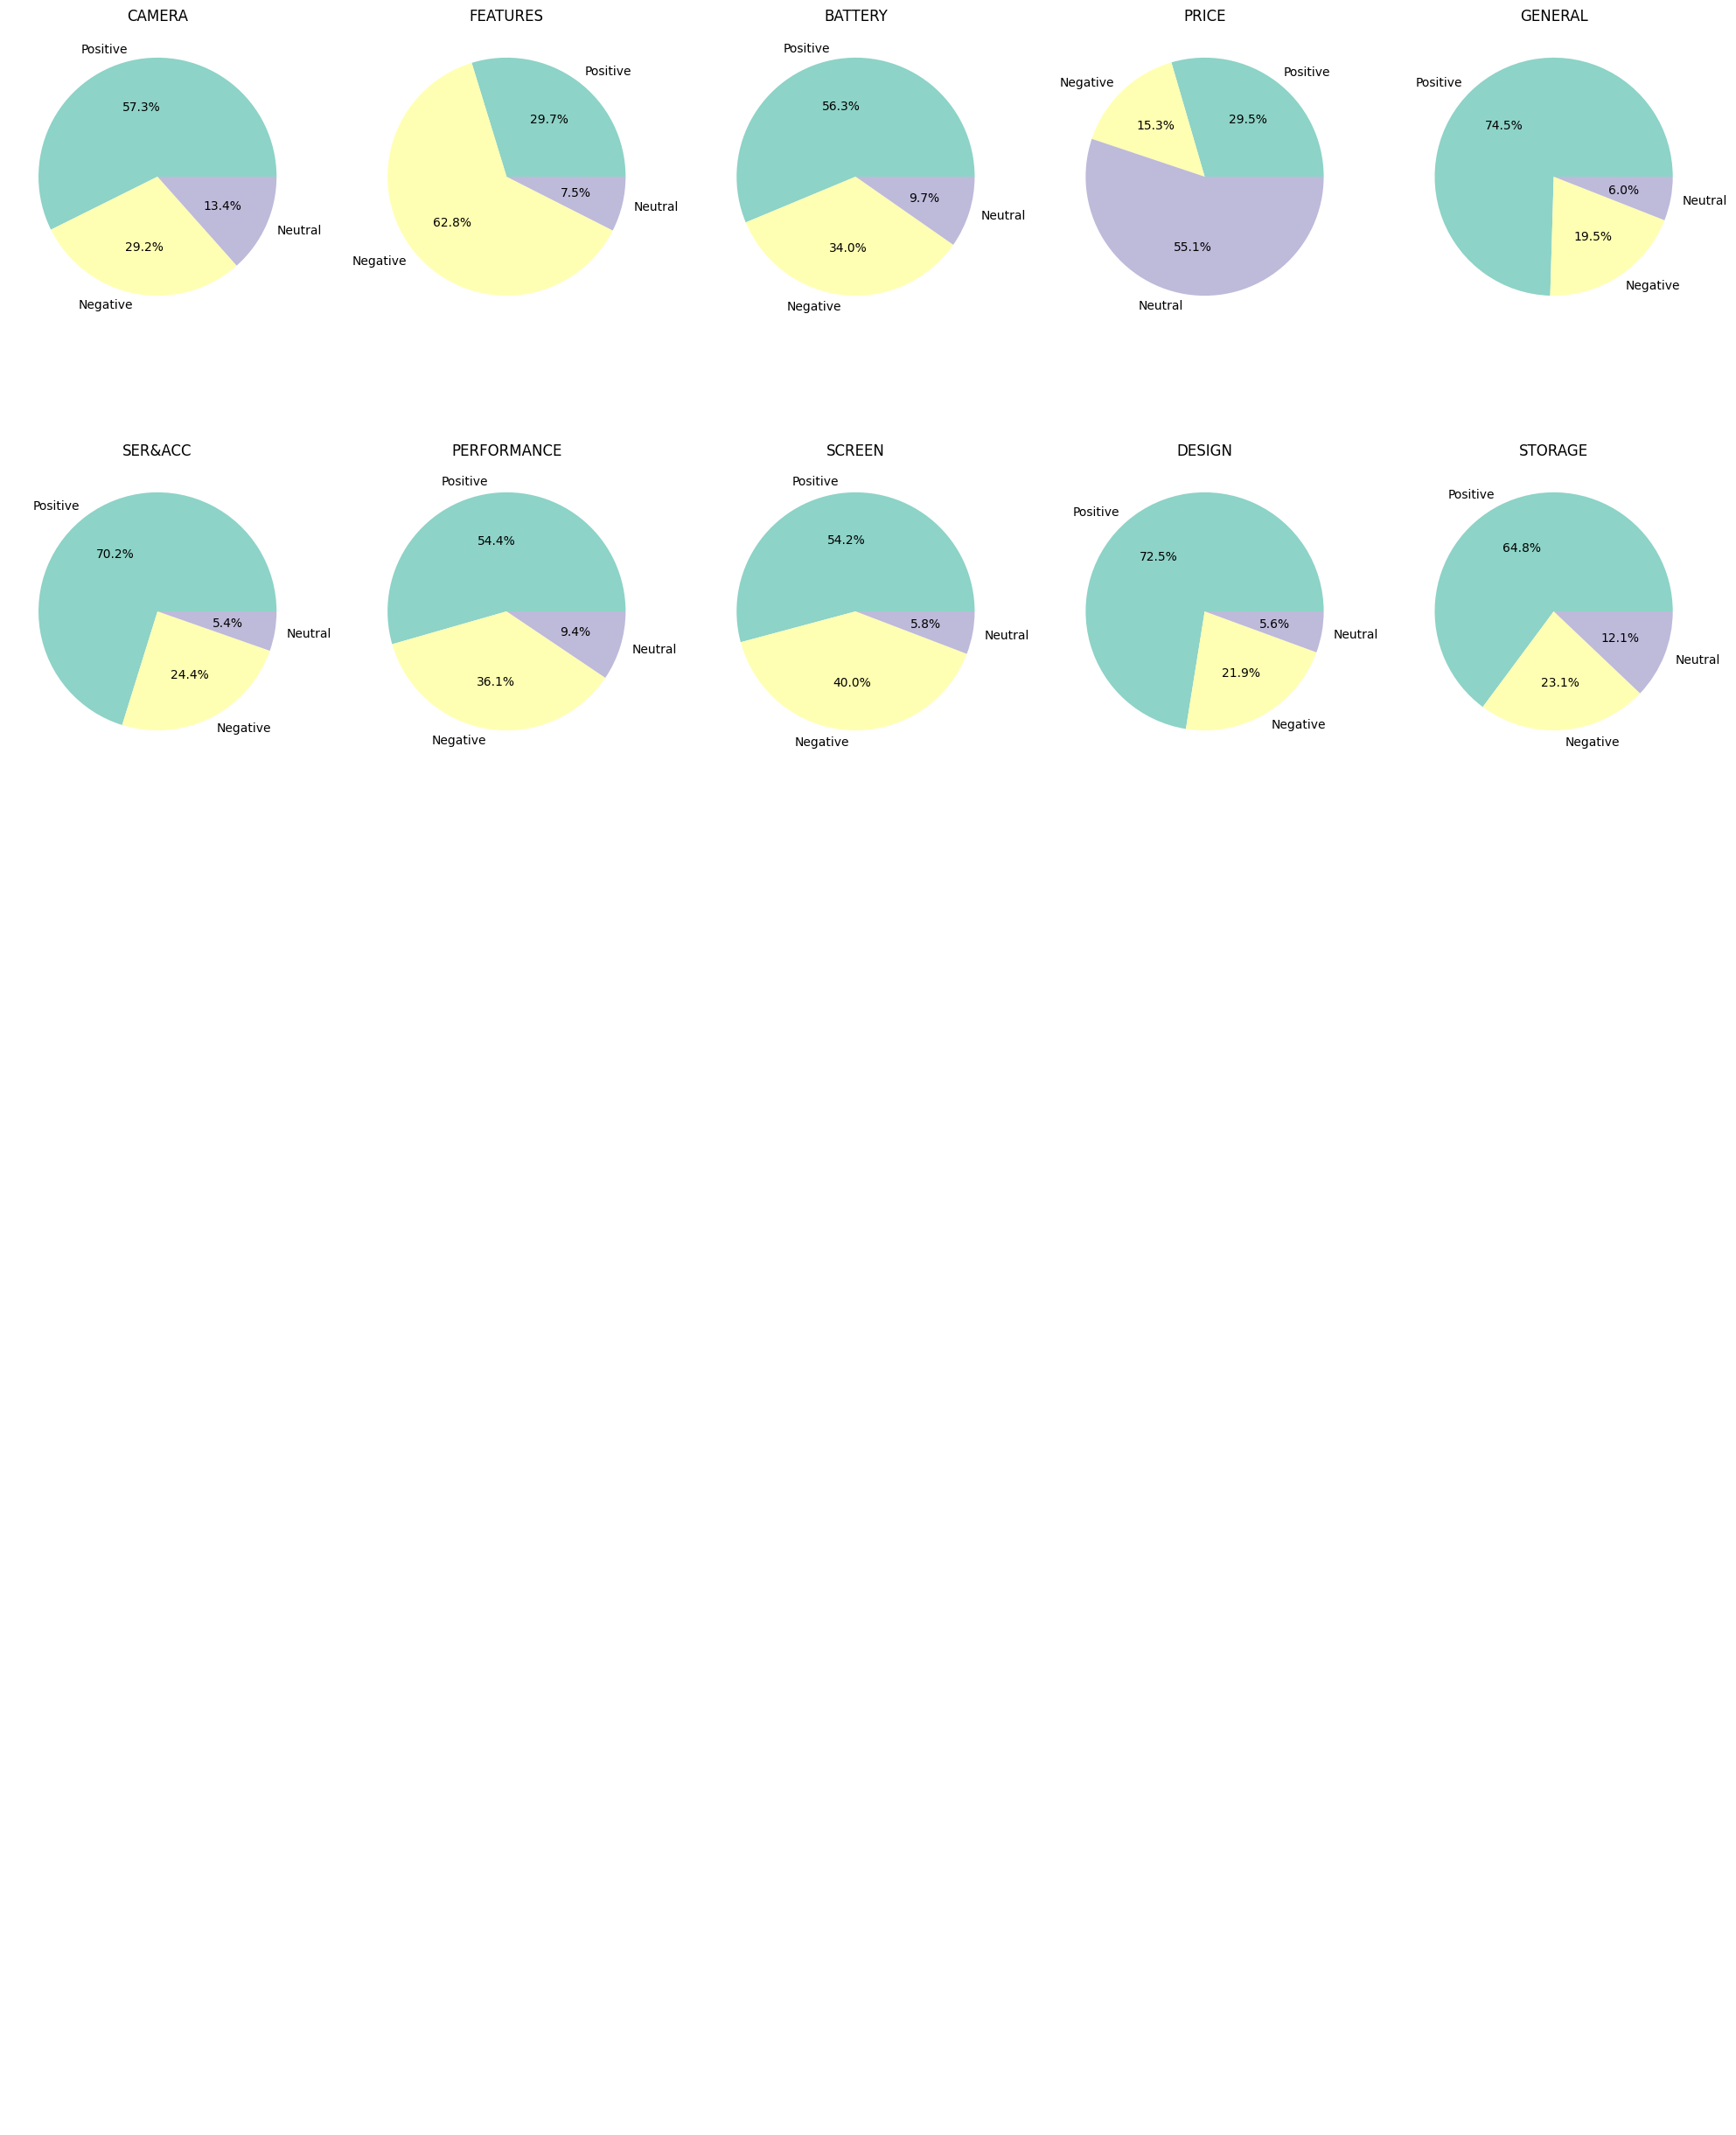

In [11]:
# Define colors for sentiments
colors = sns.color_palette('Set3')

# Create subplots
fig, axes = plt.subplots(5, 5, figsize=(20, 25))

# Flatten axes array to simplify indexing
axes = axes.flatten()

# Iterate over each aspect and create a pie chart
for i, aspect in enumerate(df_train_plot['Aspect']):
    positive = df_train_plot['Positive'][i]
    negative = df_train_plot['Negative'][i]
    neutral = df_train_plot['Neutral'][i]

    # Plot a pie chart for the current aspect
    axes[i].pie([positive, negative, neutral], labels=['Positive', 'Negative', 'Neutral'], autopct='%1.1f%%', colors=colors)
    axes[i].set_title(f'{aspect}')

# Hide empty subplots
for i in range(len(df_train_plot['Aspect']), len(axes)):
    axes[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

### **Labels Review**

#### **Khía cạnh**

+ Có tổng cộng 10 khía cạnh được trích xuất cuối cùng, ngoại trừ OTHERS. Điều này xảy ra vì OTHERS không cung cấp bất cứ thông tin nào về phân loại tình cảm (Sentiment Classification)

+ Khía cạnh có tần suất xuất hiện nhiều nhất là GENERAL: 4866.

+ Khía cạnh có tần suất xuất hiện ít nhất là STORAGE: 91.

#### **Cảm xúc**

+ Có tổng cộng 3 loại cảm xúc: Tích cực, tiêu cực và bình thường.

+ Cảm xúc tích cực chiếm hơn một nửa dữ liệu => imbalanced data

**=>Trong trường hợp mô hình hoạt động không tốt với những khía cạnh và nhãn có tần suất xuất hiện ít, cần thực hiện data augmentation**



## **EDA TEXT**

In [12]:
# Hàm để tách và tính kích thước từ vựng
def get_vocab_size(series):
    # Tách tất cả các từ trong series và chuyển đổi thành một list duy nhất
    all_words = series.str.split(expand=True).stack().unique()
    # Đếm số lượng từ duy nhất
    vocab_size = len(all_words)
    return vocab_size

In [13]:
df_test = pd.read_csv("C:/Users/FPTSHOP/OneDrive/Documents/SAV/data/RawData/mobileData/Test.csv", index_col=0)
df_val = pd.read_csv("C:/Users/FPTSHOP/OneDrive/Documents/SAV/data/RawData/mobileData/Dev.csv", index_col=0)

In [14]:
df_train['word_count'] = df_train['comment'].apply(lambda x: len(x.split()))
df_test['word_count'] = df_test['comment'].apply(lambda x: len(x.split()))
df_val['word_count'] = df_val['comment'].apply(lambda x: len(x.split()))

average_words_train = df_train['word_count'].mean()
average_words_test = df_test['word_count'].mean()
average_words_val = df_val['word_count'].mean()

In [15]:
print(f"Số từ trung bình trong mỗi câu review là: {average_words_train}")
print(f"Số từ trung bình trong mỗi câu review tập test là: {average_words_test}")
print(f"Số từ trung bình trong mỗi câu review tập val là: {average_words_val}")

Số từ trung bình trong mỗi câu review là: 36.31979434447301
Số từ trung bình trong mỗi câu review tập test là: 35.10971223021583
Số từ trung bình trong mỗi câu review tập val là: 36.25945945945946


In [16]:
vocab_size_train = get_vocab_size(df_train['comment'])
vocab_size_test = get_vocab_size(df_test['comment'])
vocab_size_val = get_vocab_size(df_val['comment'])

In [17]:
print(f'Vocab size train: {vocab_size_train}')
print(f'Vocab size val: {vocab_size_val}')
print(f'Vocab size test: {vocab_size_test}')

Vocab size train: 17360
Vocab size val: 7915
Vocab size test: 5240


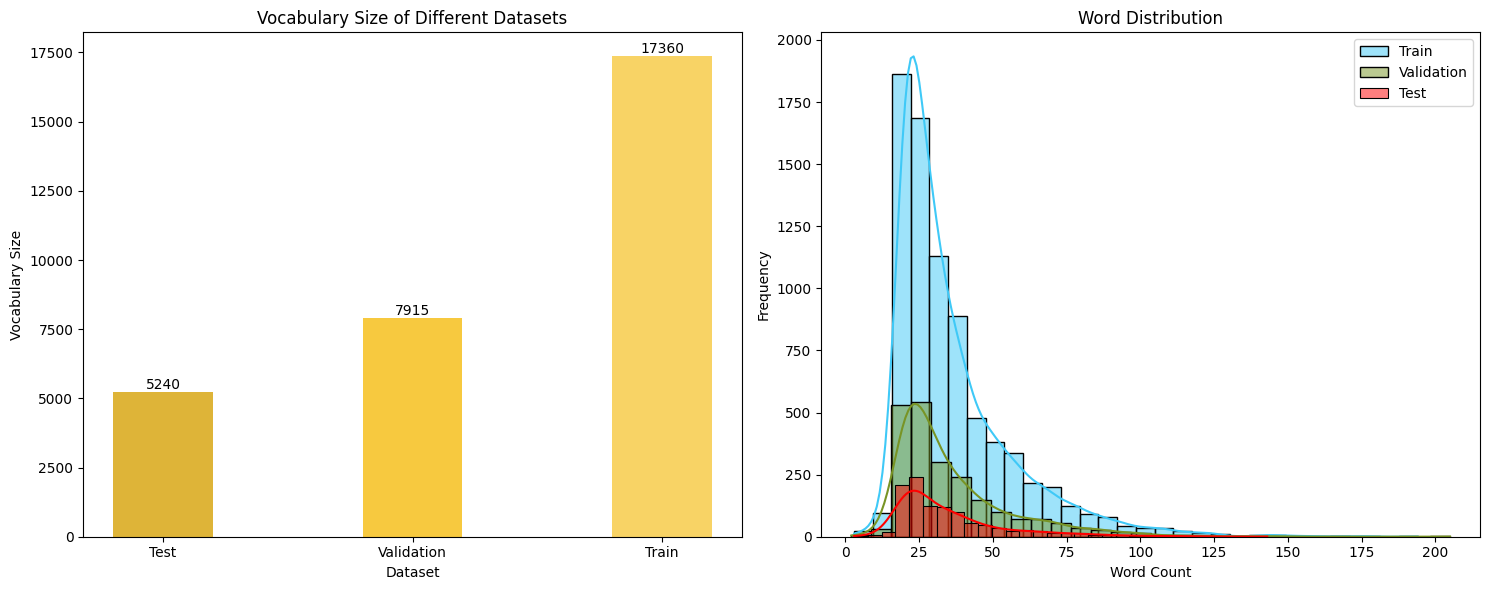

In [18]:
# Danh sách các tên của bộ dữ liệu và giá trị của vocab size
datasets = ['Test', 'Validation', 'Train']
vocab_sizes = [vocab_size_test, vocab_size_val, vocab_size_train]

# Tạo figure và axes cho subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
for i, (dataset, size) in enumerate(zip(datasets, vocab_sizes)):
    axs[0].text(i, size, str(size), ha='center', va='bottom')
# Biểu đồ cột ngang
axs[0].bar(datasets, vocab_sizes, color=['#deb438', '#f7c93f', '#f8d365'], width=0.4)
axs[0].set_xlabel('Dataset')
axs[0].set_ylabel('Vocabulary Size')
axs[0].set_title('Vocabulary Size of Different Datasets')

# Biểu đồ histogram
sns.histplot(df_train['word_count'], color="#3fc9f7", label="Train", bins=30, kde=True, ax=axs[1])
sns.histplot(df_val['word_count'], color="#789425", label="Validation", bins=30, kde=True, ax=axs[1])
sns.histplot(df_test['word_count'], color="red", label="Test", bins=30, kde=True, ax=axs[1])
axs[1].legend()
axs[1].set_title('Word Distribution')
axs[1].set_xlabel('Word Count')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
